In [1]:
#MultiClass classifier. Predicts one attribute as one of many labels rather than just 2 possible labels.
#This assumes there is only one right answer. We could do multilabel classification and present multiple city solutions to the user?
#https://scikit-learn.org/stable/modules/multiclass.html    a look at different kinds of models

""" method of going through multiple models
 https://medium.com/analytics-vidhya/testing-multiple-machine-learning-models-at-once-without-getting-a-headache-5aefb0e7df03    simple good
 https://github.com/j-planet/machine-learning-big-loop   more advanced, but better. (get parameters.py from this, and the cell for running multiple things"""

"""https://stackoverflow.com/questions/23045318/grid-search-over-multiple-classifiers
Smallest, simple to

https://www.codegrepper.com/code-examples/whatever/gridsearchcv+with+multiple+models
Straightforward

https://www.davidsbatista.net/blog/2018/02/23/model_optimization/
Large, hard to understand, but powerful

https://github.com/davidsbatista/machine-learning-notebooks/blob/master/hyperparameter-across-models.ipynb
Large, hard to understand, but powerful"""

#to do
# find best testing method
# get best parameters
# use repeatedstratifiedkfold for the final gridsearches on the best model

#to ask
#why do his cells not work
#No sequal stuff available

# Import necessary modules from repository
from model.data.pipeline import utils as ut
import numpy as np
import pandas as pd


mod 2:
discover and visualize the data
    corrolations
    attribute combinations
Select a Performance Measure
custom transformers where necessary
feature scaling options
transformation pipelines
evaluating
    evaluation using cross-validation
fine-tune
    grid search
    randomized search
ensemble methods
Analyze the Best Models and Their Errors
Evaluate Your System on the Test Set

mod 3:
Performance Measures
    Measuring Accuracy Using Cross-Validation
    Confusion Matrix

mod 8:
ensemble

mod 9:
dimentionality Reduction

In [2]:
#dataframe of all monthly data
df = ut.load_sql_as_df('SELECT * From MonthlyDataModel;')

#dataframe of month averages to fill in bad values
monthAvg = ut.load_sql_as_df('SELECT * From MonthlyAverages;')

print(df.info())  #consider not using the least important ones that have the least amount on non-null
print(monthAvg.info())
print(df.describe())
print(" \n\n\n MONTH AVERAGES: \n", monthAvg.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117036 entries, 0 to 117035
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   latitude              117036 non-null  float64
 1   longitude             117036 non-null  float64
 2   elevation             117036 non-null  float64
 3   state                 117036 non-null  object 
 4   region                117036 non-null  object 
 5   month                 117036 non-null  int64  
 6   prcp_normal           110148 non-null  float64
 7   prcp_days_t           88356 non-null   float64
 8   temp_max_normal       89256 non-null   float64
 9   temp_min_normal       89256 non-null   float64
 10  snow_depth_days       61932 non-null   float64
 11  snow_days_t           75084 non-null   float64
 12  clouds                5201 non-null    float64
 13  dew_point             5337 non-null    float64
 14  heat_index            5351 non-null    float64
 15  

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'elevation'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'prcp_normal'}>,
        <AxesSubplot:title={'center':'prcp_days_t'}>,
        <AxesSubplot:title={'center':'temp_max_normal'}>,
        <AxesSubplot:title={'center':'temp_min_normal'}>],
       [<AxesSubplot:title={'center':'snow_depth_days'}>,
        <AxesSubplot:title={'center':'snow_days_t'}>,
        <AxesSubplot:title={'center':'clouds'}>,
        <AxesSubplot:title={'center':'dew_point'}>],
       [<AxesSubplot:title={'center':'heat_index'}>,
        <AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'wind_calm_percentage'}>]],
      dtype=object)

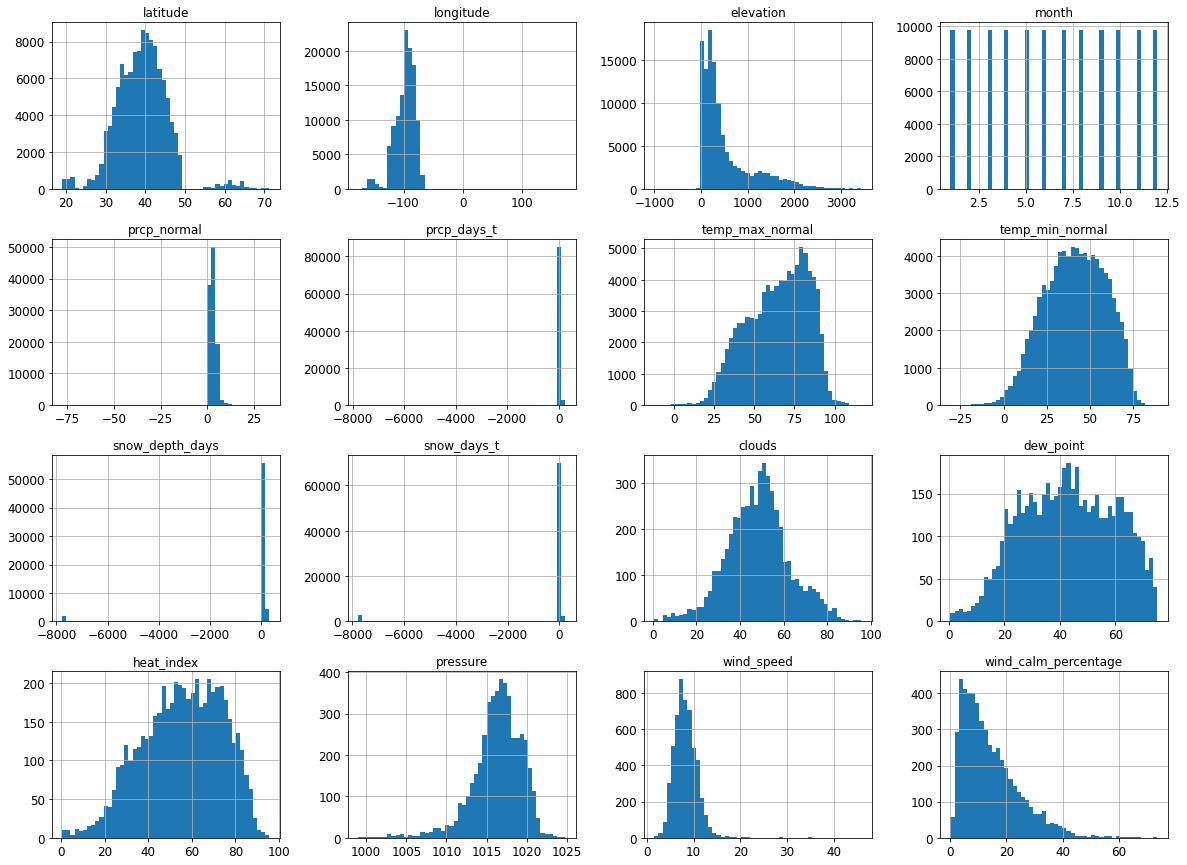

In [3]:
# matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

df.hist(bins=50, figsize=(20, 15))

In [4]:
# Getting features and choosing labels. Fill NaN spots with NaN text to manipulate them
labels = df["state"]
#['region', 'latitude', 'longitude', 'elevation', 'region'] are all dropped automatically
df = df.fillna('NaN')

# Changing columns in to months to help compare
featSer = df["month"].to_numpy()
prcpIntM = monthAvg["prcpInt"].to_numpy()
prcpFreqM = monthAvg["prcpFreq"].to_numpy()
temp_max_normalM = monthAvg["temp_max_normal"].to_numpy()
temp_min_normalM = monthAvg["temp_min_normal"].to_numpy()
snow_depthM = monthAvg["snowInt"].to_numpy()
snow_daysM = monthAvg["snowFreq"].to_numpy()
cloudsM = monthAvg["clouds"].to_numpy()
dewM = monthAvg["dew_point"].to_numpy()
heatM = monthAvg["heat_index"].to_numpy()
pressureM = monthAvg["pressure"].to_numpy()
windM = monthAvg["wind_speed"].to_numpy()
windCalmM = monthAvg["wind_calm_percentage"].to_numpy()

prcp_normRay = df["prcp_normal"].to_numpy()
prcp_days_tRay = df["prcp_days_t"].to_numpy()
temp_max_normalRay = df["temp_max_normal"].to_numpy()
temp_min_normalRay = df["temp_min_normal"].to_numpy()
snow_depthRay = df["snow_depth_days"].to_numpy()
snow_daysRay = df["snow_days_t"].to_numpy()
cloudsRay = df["clouds"].to_numpy()
dewRay = df["dew_point"].to_numpy()
heatRay = df["heat_index"].to_numpy()
pressureRay = df["pressure"].to_numpy()
windRay = df["wind_speed"].to_numpy()
windCalmRay = df["wind_calm_percentage"].to_numpy()

#replacing bad values
for i in range(len(featSer)):
    if prcp_normRay[i] == 'NaN' or prcp_normRay[i] == -9999 or prcp_normRay[i] == -8888 or prcp_normRay[i] == -7777 or prcp_normRay[i] == -6666 or prcp_normRay[i] == -5555:
        prcp_normRay[i] = prcpIntM[featSer[i] - 1]
    if prcp_days_tRay[i] == 'NaN' or prcp_days_tRay[i] == -9999 or prcp_days_tRay[i] == -8888 or prcp_days_tRay[
        i] == -7777 or prcp_days_tRay[i] == -6666 or prcp_days_tRay[i] == -5555:
        prcp_days_tRay[i] = prcpFreqM[featSer[i] - 1]
    if temp_max_normalRay[i] == 'NaN' or temp_max_normalRay[i] == -9999 or temp_max_normalRay[i] == -8888 or temp_max_normalRay[i] == -7777 or temp_max_normalRay[i] == -6666 or temp_max_normalRay[i] == -5555:
        temp_max_normalRay[i] = temp_max_normalM[featSer[i] - 1]
    if temp_min_normalRay[i] == 'NaN' or temp_min_normalRay[i] == -9999 or temp_min_normalRay[i] == -8888 or temp_min_normalRay[i] == -7777 or temp_min_normalRay[i] == -6666 or temp_min_normalRay[i] == -5555:
        temp_min_normalRay[i] = temp_min_normalM[featSer[i] - 1]
    if snow_depthRay[i] == 'NaN' or snow_depthRay[i] == -9999 or snow_depthRay[i] == -8888 or snow_depthRay[i] == -7777 or snow_depthRay[i] == -6666 or snow_depthRay[i] == -5555:
        snow_depthRay[i] = snow_depthM[featSer[i] - 1]
    if snow_daysRay[i] == 'NaN' or snow_daysRay[i] == -9999 or snow_daysRay[i] == -8888 or snow_daysRay[i] == -7777 or snow_daysRay[i] ==-6666 or snow_daysRay[i] == -5555:
        snow_daysRay[i] = snow_daysM[featSer[i] - 1]
    if cloudsRay[i] == 'NaN' or cloudsRay[i] == -9999 or cloudsRay[i] == -8888 or cloudsRay[i] == -7777 or cloudsRay[i] == -6666 or cloudsRay[i] == -5555:
        cloudsRay[i] = cloudsM[featSer[i] - 1]
    if dewRay[i] == 'NaN' or dewRay[i] == -9999 or dewRay[i] == -8888 or dewRay[i] == -7777 or dewRay[i] == -6666 or dewRay[i] == -5555:
        dewRay[i] = dewM[featSer[i] - 1]
    if heatRay[i] == 'NaN' or heatRay[i] == -9999 or heatRay[i] == -8888 or heatRay[i] == -7777 or heatRay[i] == -6666 or heatRay[i] == -5555:
        heatRay[i] = heatM[featSer[i] - 1]
    if pressureRay[i] == 'NaN' or pressureRay[i] == -9999 or pressureRay[i] == -8888 or pressureRay[i] == -7777 or pressureRay[i] == -6666 or pressureRay[i] == -5555:
        pressureRay[i] = pressureM[featSer[i] - 1]
    if windRay[i] == 'NaN' or windRay[i] == -9999 or windRay[i] == -8888 or windRay[i] == -7777 or windRay[i] == -6666 or windRay[i] == -5555:
        windRay[i] = windM[featSer[i] - 1]
    if windCalmRay[i] == 'NaN' or windCalmRay[i] == -9999 or windCalmRay[i] == -8888 or windCalmRay[i] == -7777 or windCalmRay[i] == -6666 or windCalmRay[i] == -5555:
        windCalmRay[i] = windCalmM[featSer[i] - 1]

df1 = df.copy()
# Recreating filled dataset
df = pd.DataFrame({'state': labels, 'prcp_normRay': prcp_normRay, 'prcp_days_tRay': prcp_days_tRay,
                   "temp_max_normalRay": temp_max_normalRay, "temp_min_normalRay": temp_min_normalRay,
                   "snow_depthRay": snow_depthRay, "snow_daysRay": snow_daysRay, "cloudsRay": cloudsRay,
                   "dewRay": dewRay, "heatRay": heatRay, "pressureRay": pressureRay, "windRay": windRay,
                   "windCalmRay": windCalmRay})


<AxesSubplot:>

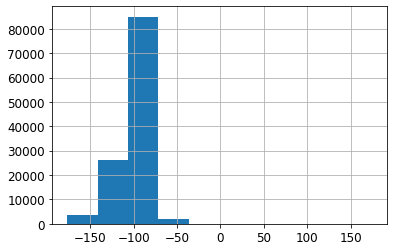

In [5]:
#df["temp_max_normalRay"].hist()
df1["longitude"].hist()

In [6]:
#adds another column showing which bin every row falls into. The bins are based on the temp_max_normalRay column
df['longitude_bin'] = pd.cut(df1['longitude'],
                             bins=[-400, -125, -100, -75, np.inf],
                             labels=[1, 2, 3, 4])
df


,state,prcp_normRay,prcp_days_tRay,temp_max_normalRay,temp_min_normalRay,snow_depthRay,snow_daysRay,cloudsRay,dewRay,heatRay,pressureRay,windRay,windCalmRay,longitude_bin
0,AL,5.3,69.0,41.924644,21.303576,0.0,0.0,55.667977,26.341895,35.417982,1018.967064,8.593669,14.68457,3
1,AL,5.07,65.0,45.985372,24.106816,0.0,0.0,55.013862,28.228661,38.559721,1018.084567,8.813964,13.644477,3
2,AL,5.8,62.0,54.495133,31.252366,-309.95931,-297.336583,52.051446,33.052022,45.700434,1016.38444,9.329369,11.746978,3
3,AL,3.77,48.0,64.407005,39.586609,0.0,0.0,49.932187,39.67777,54.337107,1014.836497,9.386922,11.09783,3
4,AL,3.82,48.0,73.406937,48.77541,0.0,0.0,48.941521,48.669454,63.3096,1014.35943,8.659783,12.057727,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117031,NE,3.22,25.909684,85.4,62.7,-6.026158,-32.307496,40.020323,59.955251,74.535821,1015.39399,7.050787,16.593875,3
117032,NE,3.04,46.810539,77.8,53.6,-156.429374,-337.711363,41.015647,53.890063,67.271141,1015.676289,7.402396,16.429875,3
117033,NE,2.04,47.409751,65.2,40.6,-553.695795,-656.829311,45.018233,44.25134,56.376711,1016.88648,7.768246,16.520839,3
117034,NE,1.41,49.541899,49.7,28.0,-244.419299,-363.569282,51.45818,35.445112,45.895488,1017.744118,8.266765,15.842452,3


<AxesSubplot:>

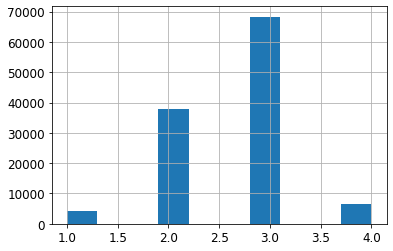

In [7]:
df["longitude_bin"].hist()

In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(method="ffill", inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                               random_state=42)  #n_splits is training date, test_size is target

for train_index, test_index in split.split(df, df["longitude_bin"]):  #shows it is an iterateable object
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


#SELECT COUNT(*) GROUP BY region;
#     check if we need strat_sampling

In [9]:
feat_train = strat_train_set.drop(['state', 'longitude_bin'], axis=1)
lab_train = strat_train_set['state']
feat_test = strat_test_set.drop(['state', 'longitude_bin'], axis=1)
lab_test = strat_test_set['state']

In [10]:
corr_matrix = feat_train.corr()  #anything above .8 corrolation means u are probably measuring the same thing
corr_matrix["pressureRay"].sort_values(ascending=False)  #comparing values to pressureRay

pressureRay           1.000000
cloudsRay             0.589498
windCalmRay           0.224707
windRay               0.135254
snow_daysRay          0.009959
snow_depthRay         0.008515
prcp_normRay         -0.076374
prcp_days_tRay       -0.080668
temp_min_normalRay   -0.670077
temp_max_normalRay   -0.703594
dewRay               -0.744349
heatRay              -0.794147
Name: pressureRay, dtype: float64

array([[<AxesSubplot:xlabel='dewRay', ylabel='dewRay'>,
        <AxesSubplot:xlabel='pressureRay', ylabel='dewRay'>,
        <AxesSubplot:xlabel='temp_max_normalRay', ylabel='dewRay'>,
        <AxesSubplot:xlabel='cloudsRay', ylabel='dewRay'>],
       [<AxesSubplot:xlabel='dewRay', ylabel='pressureRay'>,
        <AxesSubplot:xlabel='pressureRay', ylabel='pressureRay'>,
        <AxesSubplot:xlabel='temp_max_normalRay', ylabel='pressureRay'>,
        <AxesSubplot:xlabel='cloudsRay', ylabel='pressureRay'>],
       [<AxesSubplot:xlabel='dewRay', ylabel='temp_max_normalRay'>,
        <AxesSubplot:xlabel='pressureRay', ylabel='temp_max_normalRay'>,
        <AxesSubplot:xlabel='temp_max_normalRay', ylabel='temp_max_normalRay'>,
        <AxesSubplot:xlabel='cloudsRay', ylabel='temp_max_normalRay'>],
       [<AxesSubplot:xlabel='dewRay', ylabel='cloudsRay'>,
        <AxesSubplot:xlabel='pressureRay', ylabel='cloudsRay'>,
        <AxesSubplot:xlabel='temp_max_normalRay', ylabel='cloudsRay'>,
   

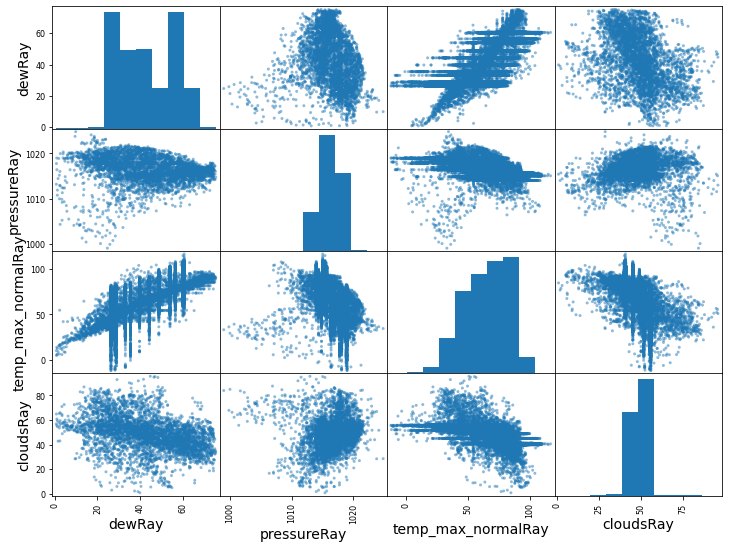

In [11]:
from pandas.plotting import scatter_matrix  #plot for four of the attributes to see how they relate

attributes = ["dewRay", "pressureRay", "temp_max_normalRay", "cloudsRay"]

scatter_matrix(feat_train[attributes], figsize=(12, 9))


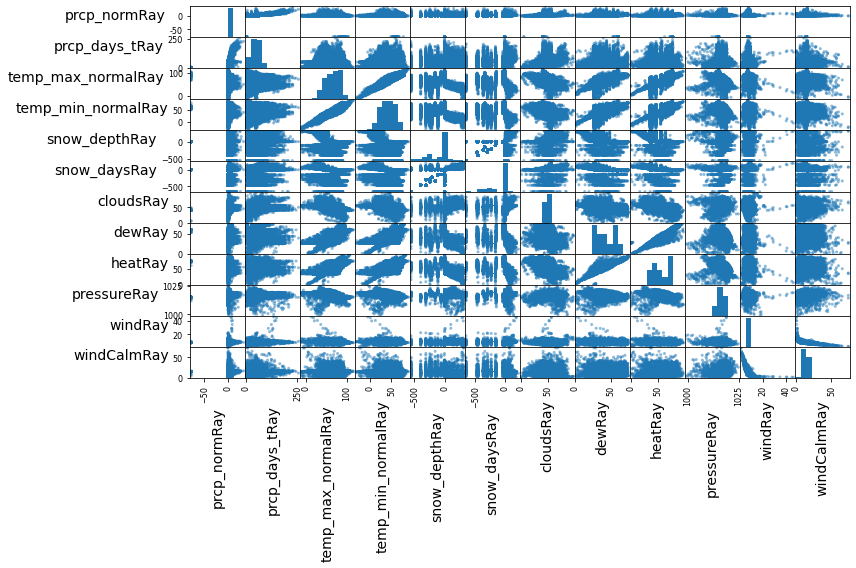

In [12]:
axes = scatter_matrix(feat_train, figsize=(12, 8))  #plot for all attributes to see how they relate to each other

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [13]:
"""# we are going to combine attributes. Feature extraction
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]"""

'# we are going to combine attributes. Feature extraction\nhousing["rooms_per_household"] = housing["total_rooms"] / housing["households"]\nhousing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]\nhousing["population_per_household"] = housing["population"] / housing["households"]'

In [14]:
from sklearn.preprocessing import StandardScaler

#Scalling all data
scaler = StandardScaler()
featPrepped = scaler.fit_transform(feat_train)
featPrepped

array([[-1.08150597, -0.06984349,  1.4576252 , ..., -1.35045921,
        -0.31447568, -0.31727317],
       [ 1.21205432,  1.03021787,  1.01042294, ..., -1.13941985,
         0.44480393, -0.80661798],
       [-0.21564848, -0.3332189 , -0.20972151, ...,  0.99520372,
         0.61460943, -0.24707521],
       ...,
       [-0.38881998, -0.71668549,  0.23748075, ...,  1.42863607,
         0.17985965,  0.33103018],
       [ 0.14608754, -0.1201819 ,  0.46936341, ...,  1.69111265,
        -4.38872609,  9.03268915],
       [ 0.76180842,  0.16014851,  0.03872419, ...,  0.02097613,
         1.18224405, -0.91619899]])

In [15]:
"""from sklearn.model_selection import train_test_split

feat_train, feat_test, lab_train, lab_test = train_test_split(featPrepped, labels, random_state=42)
# stratify by city for separating training and testing. stratified sampling"""

'from sklearn.model_selection import train_test_split\n\nfeat_train, feat_test, lab_train, lab_test = train_test_split(featPrepped, labels, random_state=42)\n# stratify by city for separating training and testing. stratified sampling'

In [16]:

#Next 3 cells are simons and do not work

In [17]:
"""import numpy as np
TOP = 5
TMP = 62
CITIES = labels.unique()

predictions_list = []
for i in range(len(df)):
    row = df.iloc[i].sort_values(ascending=False)[:TOP]
    rowDf = row.to_frame().reset_index()
    #print([[CITIES[int(x[0])], x[1]] for x in rowDf.to_numpy()])
    vals = np.insert(np.array([[CITIES[int(x[0])], x[1]] for x in rowDf.to_numpy()]), 0, lab_test.iloc[i])
    predictions_list.append(vals)

cols = ['true']
for i in range(TOP):
    cols.append('city{x}'.format(x=i + 1))
    cols.append('prob{x}'.format(x=i + 1))

preds = pd.DataFrame(predictions_list,
                     columns=cols)
preds
"""

"import numpy as np\nTOP = 5\nTMP = 62\nCITIES = labels.unique()\n\npredictions_list = []\nfor i in range(len(df)):\n    row = df.iloc[i].sort_values(ascending=False)[:TOP]\n    rowDf = row.to_frame().reset_index()\n    #print([[CITIES[int(x[0])], x[1]] for x in rowDf.to_numpy()])\n    vals = np.insert(np.array([[CITIES[int(x[0])], x[1]] for x in rowDf.to_numpy()]), 0, lab_test.iloc[i])\n    predictions_list.append(vals)\n\ncols = ['true']\nfor i in range(TOP):\n    cols.append('city{x}'.format(x=i + 1))\n    cols.append('prob{x}'.format(x=i + 1))\n\npreds = pd.DataFrame(predictions_list,\n                     columns=cols)\npreds\n"

In [18]:
"""count = 0
for i in range(len(preds)):
    if preds.iloc[i]['true'] == preds.iloc[i]['city1']:
        count += 1
        #print('{i}: {t} and {p}'.format(i=i, t=preds['true'][i], p=preds['city1'][i]))

print('Accuracy: {r}/{t}, {p}%'.format(r=count, t=len(preds), p=round(100*count/len(preds))))"""

"count = 0\nfor i in range(len(preds)):\n    if preds.iloc[i]['true'] == preds.iloc[i]['city1']:\n        count += 1\n        #print('{i}: {t} and {p}'.format(i=i, t=preds['true'][i], p=preds['city1'][i]))\n\nprint('Accuracy: {r}/{t}, {p}%'.format(r=count, t=len(preds), p=round(100*count/len(preds))))"

In [19]:
"""CITY = 'Denver'

for i in range(len(preds)):
    row = preds.iloc[i]
    if row['true'] == CITY and row['city1'] != CITY:
        print(row['city1'])
CITIES"""

"CITY = 'Denver'\n\nfor i in range(len(preds)):\n    row = preds.iloc[i]\n    if row['true'] == CITY and row['city1'] != CITY:\n        print(row['city1'])\nCITIES"

In [22]:
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from tqdm import tqdm
from datetime import datetime as dt

start = dt.now()

log_reg_params = [{"C": 0.01}, {"C": 0.1}, {"C": 1}, {"C": 10}]
dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors": 3}, {"n_neighbors": 5}]
naive_bayes_params = [{}]
svc_params = [{"C": 0.01}, {"C": 0.1}, {"C": 1}, {"C": 10}]

modelclasses = [
    ["ExtraTreeClf", ExtraTreesClassifier()],
    ["decision tree", DecisionTreeClassifier()],
    ["random forest", RandomForestClassifier()],
]

progress_bar = tqdm(total=len(modelclasses), desc='Reading models...')

insights = []
for modelname, model in modelclasses:
    try:
        model.fit(feat_train, lab_train)
        score = model.score(feat_test, lab_test)
        insights.append((modelname, model, score))
    except:
        print(modelname, " did not work \n")
    progress_bar.update(1)

progress_bar.close()

insights.sort(key=lambda x: x[-1], reverse=True)
for modelname, model, score in insights:
    print(modelname, score)

running_secs = (dt.now() - start).seconds
print(running_secs)



Reading models...: 100%|██████████| 3/3 [00:47<00:00, 15.82s/it]

random forest 0.4178058783321941
ExtraTreeClf 0.40443438140806565
decision tree 0.32053144224196856
47


In [40]:
def evaluate(newModel, test_features, test_labels):
    predictions = newModel.fit(feat_train, lab_train).predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB

from tqdm import tqdm
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from datetime import datetime as dt

In [41]:

rf = RandomForestClassifier(warm_start=True)
ex = ExtraTreesClassifier(warm_start=True)
bnb = BernoulliNB(binarize=0.0, class_prior=None, fit_prior=True)
cnb = ComplementNB(class_prior=None, fit_prior=True, norm=False)
mnb = MultinomialNB(class_prior=None, fit_prior=True)
gnb = GaussianNB(priors=None)
rn = RadiusNeighborsClassifier()
lr = LogisticRegression()
rc = RidgeClassifier()
svc = SVC()
lsvc = LinearSVC()
nu = NuSVC()
mplN = MLPClassifier(batch_size='auto', warm_start=True, max_iter=400)
mplS = MLPClassifier(batch_size='auto', warm_start=True, solver='sgd', max_iter=400, early_stopping=True)
mplA = MLPClassifier(batch_size='auto', warm_start=True, solver='adam', max_iter=400, early_stopping=True)
nc = NearestCentroid()
qda = QuadraticDiscriminantAnalysis()
kn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
gpc = GaussianProcessClassifier()
sgd = SGDClassifier()

ensemble_clf = [rf, ex, bnb, cnb, mnb, gnb, rn, lr, rc, svc, lsvc, nu, mplN,mplS,mplA, nc, qda, kn, lda, gpc, sgd]

rfParam = {"max_depth": range(5, 30, 8), "min_samples_leaf": range(1, 30, 10),
           "n_estimators": range(1, 10, 3),
           'bootstrap': [True, False],
           'max_features': [1, 7, 'auto', 'sqrt']}
exParam = {
    'n_estimators': range(1, 10, 3),
    "criterion": ["gini", "entropy"],
    "max_depth": range(5, 100, 25),
    'min_samples_split': range(2, 32, 10),
    #'min_samples_split': (0.000001, 0.00001, 0.0001),   #The minimum number of samples required to split an internal node
    'min_samples_leaf': range(1, 50, 25),
    'oob_score': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', range(50, 200, 75)],
    'bootstrap': [True, False],
    'warm_start': [True, False],
}
bnbParam = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
            }
cnbParam = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
            }
mnbParam = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
            }
gnbParam = {
    'var_smoothing': np.logspace(0, -9, num=15)
}
rnParam = {'radius': np.arange(0.8, 1.5, 0.4),
           'weights': ['uniform', 'distance']}
lrParam = {'solvers': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l2', 'l1'],
           'C': [1000, 10, 0.1, 0.0001]}
rcParam = {'alpha': [0.1, 0.4, 0.8, 1.0]}
svcParam = {'C': [0.001, 1, 50, 100, 'auto'],
            'gamma': [0.001, 0.1, 1.0, 100, 1000],
            'kernel': ['rbf', 'linear', 'sigmoid']
            }
lsvcParam = {
    'C': [0.1, 0.5, 1.0, 10.0],
}
nuParam = {
    'nu': [0.1, 1.0],
    'kernel': ['linear', 'rbf', 'sigmoid', ],
    'gamma': ['auto', 'scale']
}
mplNParam = {
    'hidden_layer_sizes': (10,120,10),
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'alpha': (0.000001, 0.00001, 0.0001),
    'solver': ('lbfgs', 'sgd', 'adam'),
    'shrinking': (True, False),
}
mplSParam = {
    'hidden_layer_sizes': (10,120,10),
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'alpha': (0.000001, 0.00001, 0.0001),
    'learning_rate': ('constant', 'invscaling', 'adaptive'),
    'momentum': (0.1,0.9,0.1),
}
mplAParam = {
    'hidden_layer_sizes': (10,120,10),
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'alpha': (0.000001, 0.00001, 0.0001),
    'beta_1': (0.1,0.9,0.1),
    'beta_2': (0.1,0.9,0.1),
                   }
ncParam = {}
qdaParam = {
    'reg_param': (0.00001, 0.001, 0.1),
    'store_covariance': (True, False),
    'tol': (0.0001, 0.01, 0.1),
}
knParam = {
    'n_neighbors': range(1, 30, 10),
    'leaf_size': range(1, 40, 15),
    'p': (1, 2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev', 'euclidean', 'manhattan'),
    'algorithm': ('auto', 'brute', 'kd_tree', 'ball_tree')}
ldaParam = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [np.arange(0, 1, 0.2), 'auto'],
            'n_components': range(0, 5, 2), 'store_covariance': (True, False)}
gpcParam = {}
sgdParam = {'loss': ['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron'],
            'penalty': ['l1', 'l2', 'elasticnet'],
            'alpha': [0.0001, 0.01, 1, 75, 1000],
            'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 'eta0': [1, 10, 100],
            'n_iter': [1, 5, 10]}

parameters_list = [rfParam, exParam, bnbParam, cnbParam, gnbParam, rnParam, lrParam, rcParam, svcParam, lsvcParam,
                   nuParam, mplNParam, mplSParam, mplAParam, ncParam, qdaParam, knParam, gpcParam, sgdParam]

In [42]:
start = dt.now()

progress_bar = tqdm(total=len(ensemble_clf), desc='Reading models...')

Grid = []

for i in range(len(ensemble_clf)):
    modelStart = dt.now()
    try:
        Grid = HalvingGridSearchCV(estimator=ensemble_clf[i], param_grid=parameters_list[i],
                                   n_jobs=-1, cv=3, verbose=0).fit(feat_train, lab_train)
        print("best param: ", Grid.best_params_)
        print("best score: ", Grid.best_score_)
        #base_accuracy = evaluate(ensemble_clf, feat_test, lab_test)
        #grid_accuracy = evaluate(Grid.best_estimator, feat_test, lab_test)
        #print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

    except:
        print("model ", ensemble_clf[i], "did not work")
    progress_bar.update(1)
    modelRunning_secs = (dt.now() - modelStart).seconds
    print("Model ", ensemble_clf[i], " running time: ", modelRunning_secs)

progress_bar.close()

running_secs = (dt.now() - start).seconds
print("Program running time: ", running_secs)




Reading models...:   0%|          | 0/2 [06:23<?, ?it/s]]
C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\joblib\parallel.py", line 

best param:  {'bootstrap': True, 'max_depth': 55, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 901}
best score:  nan
Model  RandomForestClassifier(warm_start=True)  running time:  1852


C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
8064 fits failed out of a total of 18432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2304 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(i

model  ExtraTreesClassifier(warm_start=True) did not work
Model  ExtraTreesClassifier(warm_start=True)  running time:  1018



Reading models...:  16%|█▌        | 3/19 [47:58<3:18:17, 743.58s/it] 

best param:  {'alpha': 0.5}
best score:  0.08559678319830351
Model  BernoulliNB()  running time:  7


C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\naive_bayes.py", line 1006, in _count
    check_non_negative(X, "ComplementNB (i

model  ComplementNB() did not work
Model  ComplementNB()  running time:  4



Reading models...:  26%|██▋       | 5/19 [48:03<1:07:27, 289.11s/it]

model  MultinomialNB() did not work
Model  MultinomialNB()  running time:  0



Reading models...:  32%|███▏      | 6/19 [48:07<41:38, 192.21s/it]  

model  GaussianNB() did not work
Model  GaussianNB()  running time:  4



Reading models...:  37%|███▋      | 7/19 [48:12<26:08, 130.72s/it]

model  RadiusNeighborsClassifier() did not work
Model  RadiusNeighborsClassifier()  running time:  4



Reading models...:  42%|████▏     | 8/19 [48:16<16:34, 90.38s/it] 

model  LogisticRegression() did not work
Model  LogisticRegression()  running time:  3



Reading models...:  47%|████▋     | 9/19 [48:20<10:33, 63.40s/it]

model  RidgeClassifier() did not work
Model  RidgeClassifier()  running time:  4



Reading models...:  53%|█████▎    | 10/19 [1:51:02<3:00:47, 1205.29s/it]

best param:  {'C': 10.0}
best score:  0.15216022243707883
Model  SVC()  running time:  3762



Reading models...:  58%|█████▊    | 11/19 [1:51:05<1:51:39, 837.47s/it] 

model  LinearSVC() did not work
Model  LinearSVC()  running time:  3



Reading models...:  63%|██████▎   | 12/19 [1:51:09<1:08:06, 583.78s/it]

model  NuSVC() did not work
Model  NuSVC()  running time:  3


C:\Users\Trent\Documents\ml-team3\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

Reading models...:  68%|██████▊   | 13/19 [1:59:23<55:40, 556.77s/it]  

best param:  {}
best score:  0.31906050181392404
Model  MLPClassifier()  running time:  494



Reading models...:  74%|███████▎  | 14/19 [1:59:25<32:24, 388.94s/it]

model  NearestCentroid() did not work
Model  NearestCentroid()  running time:  1



Reading models...:  79%|███████▉  | 15/19 [1:59:28<18:11, 272.84s/it]

model  QuadraticDiscriminantAnalysis() did not work
Model  QuadraticDiscriminantAnalysis()  running time:  3



Reading models...:  84%|████████▍ | 16/19 [1:59:41<09:43, 194.64s/it]

best param:  {}
best score:  0.31810997059863144
Model  KNeighborsClassifier()  running time:  13



Reading models...: 100%|██████████| 19/19 [1:59:44<00:00, 378.12s/it]

model  LinearDiscriminantAnalysis() did not work
Model  LinearDiscriminantAnalysis()  running time:  2
model  GaussianProcessClassifier() did not work
Model  GaussianProcessClassifier()  running time:  0
model  SGDClassifier() did not work
Model  SGDClassifier()  running time:  0
Program running time:  7184


In [ ]:
#testing cell
rf = RandomForestClassifier()
ex = ExtraTreesClassifier()
bnb = BernoulliNB(binarize=0.0, class_prior=None, fit_prior=True)
cnb = ComplementNB(class_prior=None, fit_prior=True, norm=False)
mnb = MultinomialNB(class_prior=None, fit_prior=True)
gnb = GaussianNB(priors=None)
rn = RadiusNeighborsClassifier()
lr = LogisticRegression()
rc = RidgeClassifier()
svc = SVC()
lsvc = LinearSVC()
nu = NuSVC()
mplN = MLPClassifier(batch_size='auto', warm_start=True, max_iter=400)
mplS = MLPClassifier(batch_size='auto', warm_start=True, solver='sgd', max_iter=400, early_stopping=True)
mplA = MLPClassifier(batch_size='auto', warm_start=True, solver='adam', max_iter=400, early_stopping=True)
nc = NearestCentroid()
qda = QuadraticDiscriminantAnalysis()
kn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
gpc = GaussianProcessClassifier()
sgd = SGDClassifier()

#ensemble_clf = [rf, ex, bnb, cnb, mnb, gnb, rn, lr, rc, svc, lsvc, nu, mplN,mplS,mplA, nc, qda, kn, lda, gpc, sgd]
ensemble_clf = [rf, ex]

rfParam = {"max_depth": range(5, 30, 5), "min_samples_leaf": range(1, 30, 10),
           "n_estimators": range(1, 15, 4),
           'bootstrap': [True,False],
           'max_features': [1, 7, 'auto', 'sqrt'],
           'warm_start': [True,False]}
exParam = {
    'n_estimators': range(5, 100, 25),
    "criterion": ["gini", "entropy"],
    "max_depth": range(5, 100, 25),
    'min_samples_split': range(2, 32, 10),
    #'min_samples_split': (0.000001, 0.00001, 0.0001),   #The minimum number of samples required to split an internal node
    'min_samples_leaf': range(1, 50, 25),
    'oob_score': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', range(50, 200, 75)],
    'bootstrap': [True,False],
    'warm_start': [True, False],
}
bnbParam = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
            }
cnbParam = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
            }
mnbParam = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
            }
gnbParam = {
    'var_smoothing': np.logspace(0, -9, num=15)
}
rnParam = {'radius': np.arange(0.8, 1.5, 0.4),
           'weights': ['uniform', 'distance']}
lrParam = {'solvers': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l2', 'l1'],
           'C': [1000, 10, 0.1, 0.0001]}
rcParam = {'alpha': [0.1, 0.4, 0.8, 1.0]}
svcParam = {'C': [0.001, 1, 50, 100, 'auto'],
            'gamma': [0.001, 0.1, 1.0, 100, 1000],
            'kernel': ['rbf', 'linear', 'sigmoid']
            }
lsvcParam = {
    'C': [0.1, 0.5, 1.0, 10.0],
}
nuParam = {
    'nu': [0.1, 1.0],
    'kernel': ['linear', 'rbf', 'sigmoid', ],
    'gamma': ['auto', 'scale']
}
mplNParam = {
    'hidden_layer_sizes': (10,120,10),
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'alpha': (0.000001, 0.00001, 0.0001),
    'solver': ('lbfgs', 'sgd', 'adam'),
    'shrinking': (True, False),
}
mplSParam = {
    'hidden_layer_sizes': (10,120,10),
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'alpha': (0.000001, 0.00001, 0.0001),
    'learning_rate': ('constant', 'invscaling', 'adaptive'),
    'momentum': (0.1,0.9,0.1),
}
mplAParam = {
    'hidden_layer_sizes': (10,120,10),
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'alpha': (0.000001, 0.00001, 0.0001),
    'beta_1': (0.1,0.9,0.1),
    'beta_2': (0.1,0.9,0.1),
                   }
ncParam = {}
qdaParam = {
    'reg_param': (0.00001, 0.001, 0.1),
    'store_covariance': (True, False),
    'tol': (0.0001, 0.01, 0.1),
}
knParam = {
    'n_neighbors': range(2, 30, 10),
    'leaf_size': range(2, 40, 15),
    'p': (1, 2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev', 'euclidean', 'manhattan'),
    'algorithm': ('auto', 'brute', 'kd_tree', 'ball_tree')}
ldaParam = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [np.arange(0, 1, 0.2), 'auto'],
            'n_components': range(0, 5, 2), 'store_covariance': (True, False)}
gpcParam = {}
sgdParam = {'loss': ['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron'],
            'penalty': ['l1', 'l2', 'elasticnet'],
            'alpha': [0.0001, 0.01, 1, 75, 1000],
            'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 'eta0': [1, 10, 100],
            'n_iter': [1, 5, 10]}

#parameters_list = [rfParam, exParam, bnbParam, cnbParam, gnbParam, rnParam, lrParam, rcParam, svcParam, lsvcParam, nuParam, mplNParam, mplSParam, mplAParam, ncParam, qdaParam, knParam, gpcParam, sgdParam]
parameters_list = [rfParam, exParam]

start = dt.now()

progress_bar = tqdm(total=len(ensemble_clf), desc='Reading models...')

Grid = []

for i in range(len(ensemble_clf)):
    modelStart = dt.now()
    Grid = HalvingGridSearchCV(estimator=ensemble_clf[i], param_grid=parameters_list[i],
                                   n_jobs=-1, cv=3, verbose=0).fit(feat_train, lab_train)
    print("best param: ", Grid.best_params_)
    print("best score: ", Grid.best_score_)
    #base_accuracy = evaluate(ensemble_clf, feat_test, lab_test)
    #grid_accuracy = evaluate(Grid.best_estimator, feat_test, lab_test)
    #print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

    progress_bar.update(1)
    modelRunning_secs = (dt.now() - modelStart).seconds
    print("Model ", ensemble_clf[i], " running time: ", modelRunning_secs)

progress_bar.close()

running_secs = (dt.now() - start).seconds
print("Program running time: ", running_secs)


In [ ]:
#test cell
rfParam = {"max_depth": range(5, 100, 25), "min_samples_leaf": range(1, 30, 10),
           "n_estimators": range(1, 1000, 300),
           'bootstrap': [True,False],
           'max_features': [1, 7, 'auto', 'sqrt']}
exParam = {
    'n_estimators': range(5, 100, 25),
    "criterion": ["gini", "entropy"],
    "max_depth": range(5, 100, 25),
    'min_samples_split': range(2, 32, 10),
    #'min_samples_split': (0.000001, 0.00001, 0.0001),   #The minimum number of samples required to split an internal node
    'min_samples_leaf': range(1, 50, 25),
    'oob_score': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', range(50, 200, 75)],
    'bootstrap': [True,False],
    'warm_start': [True, False],
}

clf = RandomForestClassifier(max_depth= 15, max_features = 'auto', min_samples_leaf = 1, n_estimators = 10, bootstrap = True)
clf.fit(feat_train, lab_train)

print(clf.score(feat_test, lab_test))  #This automatically makes predictions on feat_test

#'bootstrap': True, 'max_depth': 80, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 901

In [ ]:
clf = ExtraTreesClassifier(max_depth= 80, max_features = 'auto', min_samples_leaf = 1, n_estimators = 901, bootstrap = True)
clf.fit(feat_train, lab_train)

print(clf.score(feat_test, lab_test))  #This automatically makes predictions on feat_test

In [ ]:
# halve grid search
start = dt.now()

progress_bar = tqdm(total=len(ensemble_clf), desc='Reading models...')

Grid = []

for i in range(len(ensemble_clf)):
    modelStart = dt.now()
    Grid = HalvingGridSearchCV(estimator=ensemble_clf[i], param_grid=parameters_list[i],
                               n_jobs=-1, cv=3, verbose=0).fit(feat_train, lab_train)
    print("best param: ", Grid.best_params_)
    print("best score: ", Grid.best_score_)
    #base_accuracy = evaluate(ensemble_clf, feat_test, lab_test)
    #grid_accuracy = evaluate(Grid.best_estimator, feat_test, lab_test)
    #print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

    print("model ", ensemble_clf[i], "did not work")
    progress_bar.update(1)
    modelRunning_secs = (dt.now() - modelStart).seconds
    print("Model ", ensemble_clf[i], " running time: ", modelRunning_secs)

progress_bar.close()

running_secs = (dt.now() - start).seconds
print("Program running time: ", running_secs)



In [ ]:
#randomized grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime as dt

start = dt.now()

rf = RandomForestClassifier(random_state=4, n_jobs=-1, max_features="auto", warm_start=True)
ex = ExtraTreesClassifier(random_state=4, n_jobs=-1, max_features="auto", warm_start=True)

ensemble_clf = [rf, ex]

params1 = dict(max_depth=range(5, 30, 10), min_samples_leaf=range(1, 30, 10),
               n_estimators=range(1, 200, 100))
params2 = dict(criterion=["gini", "entropy"], max_depth=range(5, 30, 10),
               min_samples_leaf=range(1, 30, 10), n_estimators=range(1, 200, 100))

parameters_list = [params1, params2]

model_log = ["_rf", "_ex"]

progress_bar = tqdm(total=len(ensemble_clf), desc='Reading models...')

Grid = []

for i in range(len(ensemble_clf)):
    try:
        Grid = RandomizedSearchCV(ensemble_clf[i], parameters_list[i],
                                  n_jobs=-1, cv=3, verbose=3).fit(feat_train, lab_train)
        #globals()['Grid%s' % model_log[i]]=pd.DataFrame(Grid.cv_results_)
        print(Grid.best_params_)
    except:
        print("model ", i, "did not work")
    progress_bar.update(1)

progress_bar.close()

running_secs = (dt.now() - start).seconds
print(running_secs)



In [15]:
latent drichlet allocation, boosting, bagging, max entropy, NN

gadient boosting
param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
'learning_rate': (0.2, 0.3),
    'n_estimators': (100,130,5),
    'subsample' : (0.2, 0.3, 0.4),
    'min_samples_split' : (0.1,0.2,0.3),
    'min_samples_leaf' : (3,4,5),
    'max_depth': (2,3,4),


bagged decicion (BaggingClassifier)
n_estimators = [10, 100, 1000]



adaboost
'n_estimators': (300,450,5),
    'algorithm':('SAMME', "SAMME.R"),


xgboost
'learning_rate':(0.01, 0.1),
    'n_estimators': (350,450,1),
    'colsample_bytree' :(0.2, 0.3),


bagging
'n_estimators': (200,500,1),
    'max_features': (0.1,0.7, 0.01)


scoring
https://www.datasklr.com/select-classification-methods/model-selection


ensemble stuff
https://www.datasklr.com/select-classification-methods/ensemble-learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


mpl
https://www.datasklr.com/select-classification-methods/multi-layer-perceptron

mpl w/ keras      NEED TO USE STILL
https://devskrol.com/2021/12/22/advanced-hyperparameter-tuning-of-a-multilayer-perceptron-mlp/